<a href="https://colab.research.google.com/github/fyansyarafa/hate-speech-classification/blob/main/hate_speech_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klasifikasi Tweet Bermakna Ujaran Kebencian Berbahasa Indonesia**

Berdasarkan dataset https://raw.githubusercontent.com/ialfina/id-hatespeech-detection/master/IDHSD_RIO_unbalanced_713_2017.txt, akan dibuat model yang dapat mengklasifikasikan sebuah tweet ke dalam tweet berisikan ujaran kebencian atau tidak.

Model klasifikasi yang dibuat menggunakan model:


1.   Logistic Regression, dan
2.   K-Nearest Neighbour dengan jumlah tetangga = 5




In [1]:
import pandas as pd
import numpy as np

import requests
import io
import warnings 
warnings.filterwarnings("ignore")

import nltk

response = requests.get('https://raw.githubusercontent.com/ialfina/id-hatespeech-detection/master/IDHSD_RIO_unbalanced_713_2017.txt')
data = io.StringIO(response.text)

In [2]:
df = pd.read_csv(data, sep ='\t')
df.head()

,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...


In [3]:
df['Label']=df['Label'].map({'HS' : 1, 'Non_HS': 0})

In [4]:
df.head()

,Label,Tweet
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,0,RT @baguscondromowo: Mereka terus melukai aksi...
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...


In [5]:
import seaborn as sns

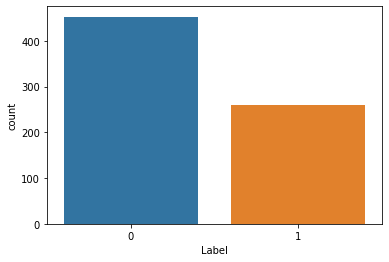

In [6]:
sns.countplot(df.Label);

# 2. PreProcessing (Data Cleaning)

## 2.1 Case Folding
Pada section ini, akan dilakukan text cleaning pada teksnya langsung agar dapat diproses pada fase training model. Tujuannya, untuk mengubah semua huruf ke dalam huruf kecil, menghilangkan angka, situs, username, dan tanda baca.

In [7]:
df2 = df.copy()

In [8]:
df2['Tweet'][0] = df2['Tweet'][0].lower()

### 2.1.1 Karakter ke LowerCase

In [9]:
for i in range(len(df2)):
  df2['Tweet'][i] = df2['Tweet'][i].lower()

In [10]:
df2.head()

,Label,Tweet
0,0,rt @spardaxyz: fadli zon minta mendagri segera...
1,0,rt @baguscondromowo: mereka terus melukai aksi...
2,0,sylvi: bagaimana gurbernur melakukan kekerasan...
3,0,"ahmad dhani tak puas debat pilkada, masalah ja..."
4,0,rt @lisdaulay28: waspada ktp palsu.....kawal p...


### 2.1.2 Menghilangkan `http...`, `www...`, dan `@...`

In [11]:
df2['Tweet'] = df2['Tweet'].replace(r"http\S+", "", regex=True)

In [12]:
df2['Tweet'] = df2['Tweet'].replace(r'www([A-Za-z0-9_]+)', '', regex=True) 

In [13]:
df2['Tweet'] = df2['Tweet'].replace(r'@([A-Za-z0-9_]+)', '', regex=True) 

In [14]:
df2.head()

,Label,Tweet
0,0,rt : fadli zon minta mendagri segera menonakti...
1,0,rt : mereka terus melukai aksi dalam rangka me...
2,0,sylvi: bagaimana gurbernur melakukan kekerasan...
3,0,"ahmad dhani tak puas debat pilkada, masalah ja..."
4,0,rt : waspada ktp palsu.....kawal pilkada


### 2.1.2 Hapus Angka

In [15]:
import re

In [16]:
testli = []

In [17]:
for i in range(len(df2)):
  testli.append(df2['Tweet'][i])

In [18]:
for i in range(len(df2)):
  df2['Tweet'][i] = re.sub(r"\d+","",testli[i])

In [19]:
df2.head()

,Label,Tweet
0,0,rt : fadli zon minta mendagri segera menonakti...
1,0,rt : mereka terus melukai aksi dalam rangka me...
2,0,sylvi: bagaimana gurbernur melakukan kekerasan...
3,0,"ahmad dhani tak puas debat pilkada, masalah ja..."
4,0,rt : waspada ktp palsu.....kawal pilkada


### 2.1.3 Hapus Tanda Baca

In [20]:
import string
for i in range(len(df2)):
  df2['Tweet'][i] = df2['Tweet'][i].translate(str.maketrans("","",string.punctuation))

In [21]:
df2.head()

,Label,Tweet
0,0,rt fadli zon minta mendagri segera menonaktif...
1,0,rt mereka terus melukai aksi dalam rangka mem...
2,0,sylvi bagaimana gurbernur melakukan kekerasan ...
3,0,ahmad dhani tak puas debat pilkada masalah jal...
4,0,rt waspada ktp palsukawal pilkada


## 2.2 Tokenizing
Merupakan proses pemisahan teks menjadi potongan-potongan kata di dalam suatu list untuk kemudian dianalisis. Analisis yang dapat digunakan yaitu untuk melihat kata-kata yang paling sering muncul dalam suatu teks/tweet.

In [22]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
for i in range(len(df2)):
  df2['Tweet'][i] = word_tokenize(df2['Tweet'][i]) 

In [25]:
df2.head()

,Label,Tweet
0,0,"[rt, fadli, zon, minta, mendagri, segera, meno..."
1,0,"[rt, mereka, terus, melukai, aksi, dalam, rang..."
2,0,"[sylvi, bagaimana, gurbernur, melakukan, keker..."
3,0,"[ahmad, dhani, tak, puas, debat, pilkada, masa..."
4,0,"[rt, waspada, ktp, palsukawal, pilkada]"


## 2.2 Filtering StopWords

Stopwords merupakan proses filtering untuk memisahkan kata-kata yang kurang penting dan dianggap sebagai kata umum dalam jumlah besar yang tidak memiliki makna.

In [26]:
pip install Sastrawi

In [27]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [28]:
# stopwords pada lib sastrawi
factory = StopWordRemoverFactory()
stopwords_list = factory.get_stop_words()
print(stopwords_list)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords

In [31]:
list_stop = stopwords.words('indonesian')

In [32]:
# menggabungkannya dengan stopwords bahasa indonesia dalam lib nltk corpus indonesian
myset = set(stopwords_list + list_stop)
myset.add('rt')

In [33]:
def stopwords_removal(words):
  return [word for word in words if word not in myset]

In [34]:
df2['Tweet'] = df2['Tweet'].apply(stopwords_removal)

In [35]:
df2.head()

,Label,Tweet
0,0,"[fadli, zon, mendagri, menonaktifkan, ahok, gu..."
1,0,"[melukai, aksi, rangka, memenjarakan, ahok, ah..."
2,0,"[sylvi, gurbernur, kekerasan, perempuan, bukti..."
3,0,"[ahmad, dhani, puas, debat, pilkada, jalan, be..."
4,0,"[waspada, ktp, palsukawal, pilkada]"


## 2.4 Stemming
Proses ini mengembalikan suatu kata berimbuhan ke bentuk dasarnya. Hal ini berguna untuk fleksibilitas suatu kata terhadap berbagai konteks kalimat dan tidak terpaku pada imbuhan-imbuhan tertentu.

In [ ]:
pip install swifter

In [36]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

In [37]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [38]:
def stemmed_wrapper(term):
  return stemmer.stem(term)

In [39]:
term_dict = {}

In [ ]:
for document in df2['Tweet']:
  for term in document:
    if term not in term_dict:
      term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df2['Final Tweets Stemmed'] = df2['Tweet'].swifter.apply(get_stemmed_term)
print(df2['Final Tweets Stemmed'])

In [42]:
df2.head()

,Label,Tweet,Final Tweets Stemmed
0,0,"[fadli, zon, mendagri, menonaktifkan, ahok, gu...","[fadli, zon, mendagri, nonaktif, ahok, gubernu..."
1,0,"[melukai, aksi, rangka, memenjarakan, ahok, ah...","[luka, aksi, rangka, penjara, ahok, ahok, gaga..."
2,0,"[sylvi, gurbernur, kekerasan, perempuan, bukti...","[sylvi, gurbernur, keras, perempuan, bukti, fo..."
3,0,"[ahmad, dhani, puas, debat, pilkada, jalan, be...","[ahmad, dhani, puas, debat, pilkada, jalan, be..."
4,0,"[waspada, ktp, palsukawal, pilkada]","[waspada, ktp, palsukawal, pilkada]"


# 3. Visualisasi Tweet Dominan Berdasarkan Label

## 3.1 Label 1: HS (HateSpeach)

In [43]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [44]:
import matplotlib.pyplot as plt

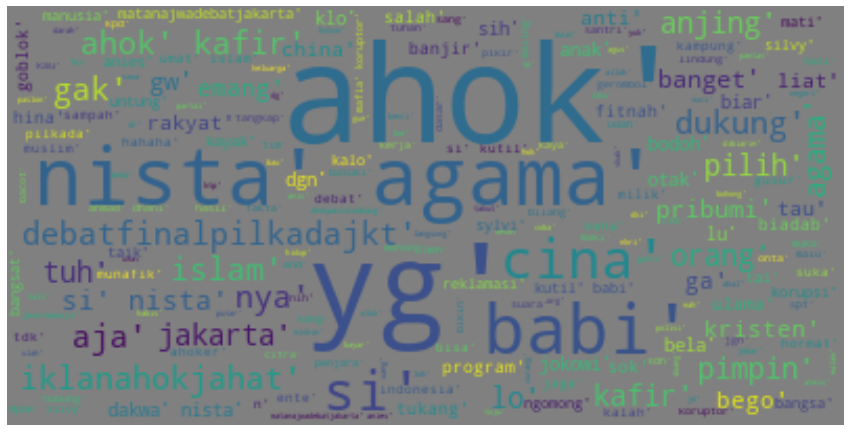

In [46]:
word = df2['Final Tweets Stemmed'][df2['Label']==1].astype('string')
word.head()
wordcloud = WordCloud(max_font_size=65, max_words=200, background_color="grey").generate_from_text(' '.join(word))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 3.2 Label 0: Non_HS (Non_HateSpeach)

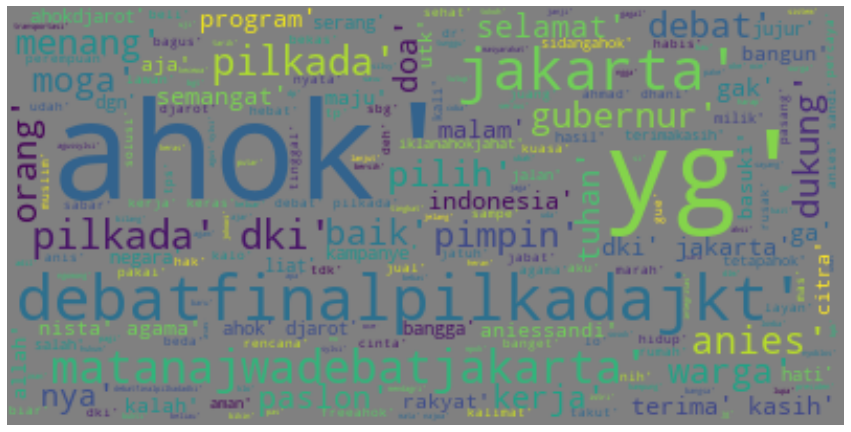

In [48]:
word = df2['Final Tweets Stemmed'][df2['Label']==0].astype('string')
word.head()
wordcloud = WordCloud(max_font_size=65, max_words=200, background_color="grey").generate_from_text(' '.join(word))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 4. Model Klasifikasi

## 4.1 Text Vectorization Menggunakan TF-IDF

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [50]:
df3 = df2.copy()

In [51]:
df3.head()

,Label,Tweet,Final Tweets Stemmed
0,0,"[fadli, zon, mendagri, menonaktifkan, ahok, gu...","[fadli, zon, mendagri, nonaktif, ahok, gubernu..."
1,0,"[melukai, aksi, rangka, memenjarakan, ahok, ah...","[luka, aksi, rangka, penjara, ahok, ahok, gaga..."
2,0,"[sylvi, gurbernur, kekerasan, perempuan, bukti...","[sylvi, gurbernur, keras, perempuan, bukti, fo..."
3,0,"[ahmad, dhani, puas, debat, pilkada, jalan, be...","[ahmad, dhani, puas, debat, pilkada, jalan, be..."
4,0,"[waspada, ktp, palsukawal, pilkada]","[waspada, ktp, palsukawal, pilkada]"


In [52]:
# list ke string
def listToString(s):
  str1 = ' '
  return(str1.join(s))

In [54]:
df3['Clean Tweets'] = df3['Final Tweets Stemmed'].apply(listToString)

In [55]:
df3['Tweet'] = df['Tweet']

In [56]:
df3.head()

,Label,Tweet,Final Tweets Stemmed,Clean Tweets
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,"[fadli, zon, mendagri, nonaktif, ahok, gubernu...",fadli zon mendagri nonaktif ahok gubernur dki
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,"[luka, aksi, rangka, penjara, ahok, ahok, gaga...",luka aksi rangka penjara ahok ahok gagal pilkada
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,"[sylvi, gurbernur, keras, perempuan, bukti, fo...",sylvi gurbernur keras perempuan bukti foto bar...
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...","[ahmad, dhani, puas, debat, pilkada, jalan, be...",ahmad dhani puas debat pilkada jalan bekas ungkap
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,"[waspada, ktp, palsukawal, pilkada]",waspada ktp palsukawal pilkada


In [57]:
X = df3['Clean Tweets']

In [58]:
y = df3['Label']

In [59]:
tfidf = TfidfVectorizer()
tfid_vector = tfidf.fit_transform(X)

## 4.2 Split Data Ke Training dan Test Data

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(tfid_vector, y, test_size=0.33, random_state=42)

## 4.3 Mengguanakan Model Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logreg = LogisticRegression()

In [64]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 4.3.1 Prediksi dan Evaluasi

In [65]:
pred = logreg.predict(X_test)

In [66]:
from sklearn.metrics import classification_report as cr
print(cr(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       163
           1       0.89      0.64      0.75        73

    accuracy                           0.86       236
   macro avg       0.87      0.80      0.83       236
weighted avg       0.87      0.86      0.86       236



In [78]:
from sklearn.metrics import confusion_matrix as cm
from sklearn import metrics

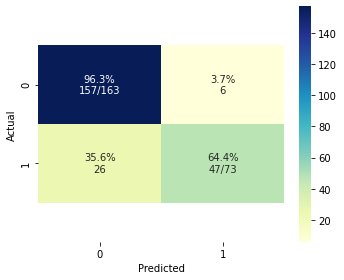

In [73]:
def plot_cm(y_true, predictions, figsize=(5,4)):
    cm = confusion_matrix(y_test, pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    annot_kws = {"ha": 'left',"va": 'bottom'}
    
    ae = sns.heatmap(cm, cmap= "YlGnBu", annot=annot,fmt='', ax=ax)
    bottom, top = ae.get_ylim()
    ae.set_ylim(bottom + 0.5, top - 0.5)
plot_cm(y_test, pred)
plt.tight_layout();

Karena terjadi *imbalance* label pada dataframe, maka metrics evaluasi yang baik digunakan adalah metric AUC.

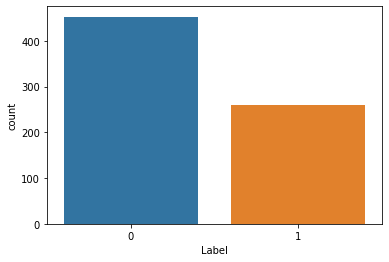

In [75]:
# countplot untuk label dataframe
sns.countplot(df3.Label);

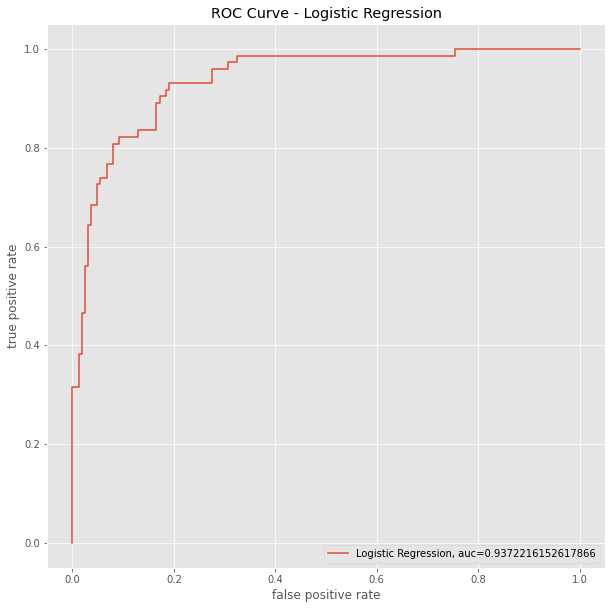

In [79]:
# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_logmodel_proba = logreg.predict_proba(X_test)[::,1]
fprlogmodel, tprlogmodel, _ = metrics.roc_curve(y_test,  y_pred_logmodel_proba)
auclogmodel = metrics.roc_auc_score(y_test, y_pred_logmodel_proba)
plt.plot(fprlogmodel,tprlogmodel,label="Logistic Regression, auc="+str(auclogmodel))
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## 4.4 Menggunakan Model KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn = KNeighborsClassifier(n_neighbors=5)

### 4.4.1 Prediksi dan Evaluasi

In [86]:
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [87]:
print(cr(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       163
           1       0.67      0.78      0.72        73

    accuracy                           0.81       236
   macro avg       0.78      0.80      0.79       236
weighted avg       0.82      0.81      0.82       236



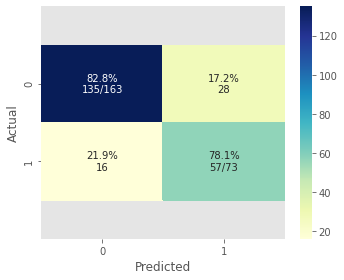

In [91]:
def plot_cm(y_true, predictions, figsize=(5,4)):
    cm = confusion_matrix(y_test, knn_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    annot_kws = {"ha": 'left',"va": 'bottom'}
    
    ae = sns.heatmap(cm, cmap= "YlGnBu", annot=annot,fmt='', ax=ax)
    bottom, top = ae.get_ylim()
    ae.set_ylim(bottom + 0.5, top - 0.5)
plot_cm(y_test, knn_pred)
plt.tight_layout();

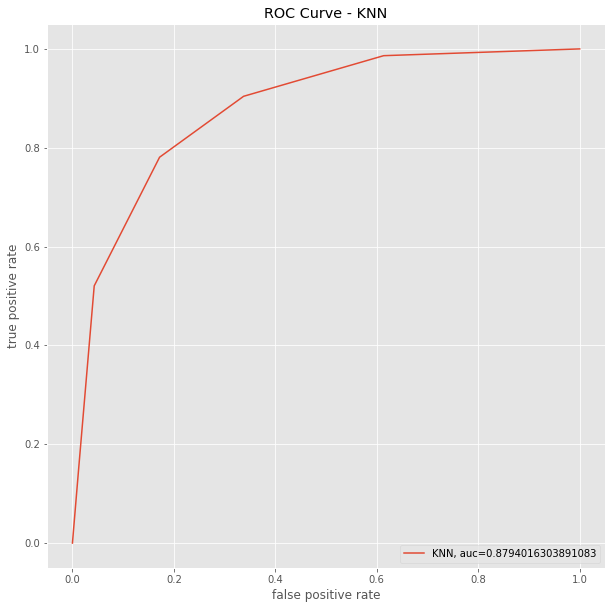

In [93]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

y_pred_knn_proba = knn.predict_proba(X_test)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(y_test,  y_pred_knn_proba)
aucknn = metrics.roc_auc_score(y_test, y_pred_knn_proba)
plt.plot(fprknn,tprknn,label="KNN, auc="+str(aucknn))
plt.title('ROC Curve - KNN')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

# 5. Menentukan Model Terbaik

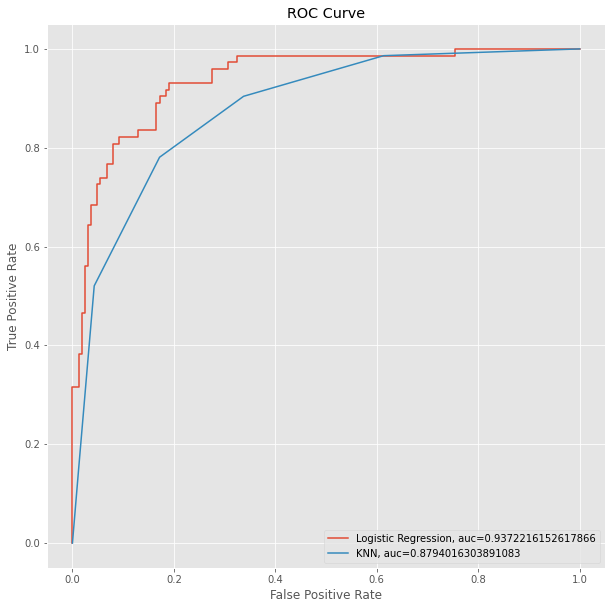

In [100]:
plt.plot(fprlogmodel,tprlogmodel,label="Logistic Regression, auc="+str(auclogmodel))
plt.plot(fprknn,tprknn,label="KNN, auc="+str(aucknn))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

Model Logistic Regression memberikan nilai yang lebih besar daripada KNN. Oleh karena itu, model terbaik yang dapat dijadikan sebagai model untuk prediksi tweet selanjutnya yaitu model dengan logistic regression.